# Student Performance Analysis

## Objective
To analyze student performance data to understand factors affecting
academic outcomes and identify patterns in scores.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("student_data.csv")
df.head()


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [4]:
df.describe()


,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study Hours,Attendance (%)
count,960.000000,960.000000,950.000000,967.000000,957.000000,960.000000,976.000000,959.000000
mean,5416.019792,85.510417,17.630526,77.598759,1.520376,80.030208,2.406967,77.248175
std,2653.748319,7.332125,6.272132,10.006640,1.046439,9.493652,1.620267,19.298148
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,-5.000000,50.000000
25%,3113.500000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,63.000000
50%,5396.500000,88.000000,18.000000,78.000000,1.000000,80.000000,2.500000,76.000000
75%,7754.750000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,89.000000
max,9998.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,200.000000


In [5]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

df.columns


Index(['studentid', 'name', 'gender', 'attendancerate', 'studyhoursperweek',
       'previousgrade', 'extracurricularactivities', 'parentalsupport',
       'finalgrade', 'study_hours', 'attendance_(%)', 'online_classes_taken'],
      dtype='object')

In [6]:
df.isnull().sum()


studentid                    40
name                         34
gender                       48
attendancerate               40
studyhoursperweek            50
previousgrade                33
extracurricularactivities    43
parentalsupport              22
finalgrade                   40
study_hours                  24
attendance_(%)               41
online_classes_taken         25
dtype: int64

In [7]:
df = df.dropna()


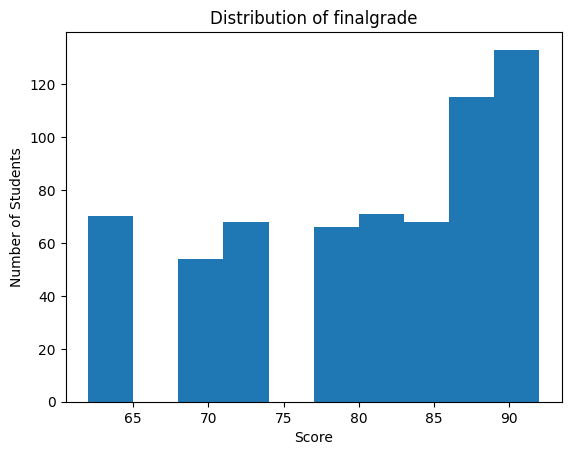

In [8]:
df["finalgrade"].plot(kind="hist", bins=10)
plt.title("Distribution of finalgrade")
plt.xlabel("Score")
plt.ylabel("Number of Students")
plt.show()


In [9]:
df[["finalgrade", "studyhoursperweek", "extracurricularactivities"]].mean()


finalgrade                   80.122481
studyhoursperweek            17.682171
extracurricularactivities     1.536434
dtype: float64

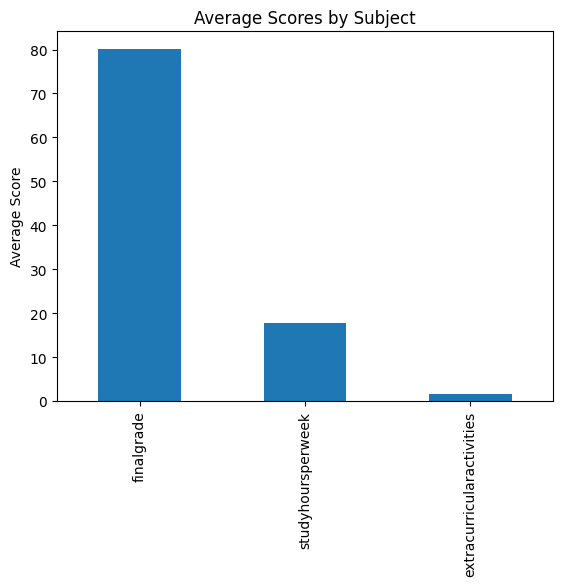

In [10]:
df[["finalgrade", "studyhoursperweek", "extracurricularactivities"]].mean().plot(kind="bar")
plt.title("Average Scores by Subject")
plt.ylabel("Average Score")
plt.show()


In [ ]:
df.groupby("gender")[["finalgrade", "studyhourssperweek", "extracurricularactivities"]].mean()


,finalgrade,studyhoursperweek,extracurricularactivities
gender,,,
Female,80.668852,17.77377,1.567213
Male,79.632353,17.60000,1.508824


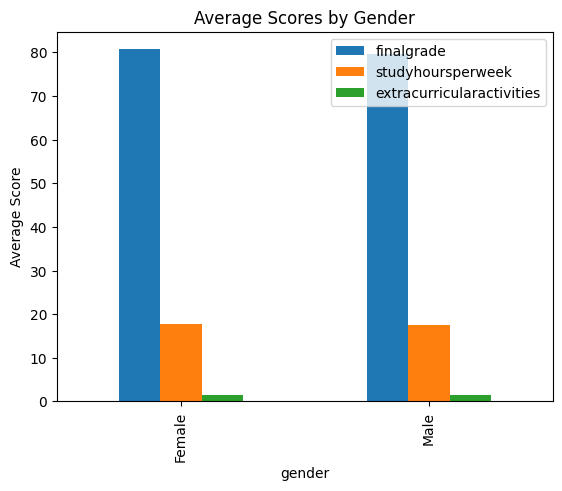

In [13]:
df.groupby("gender")[["finalgrade","studyhoursperweek","extracurricularactivities"]].mean().plot(kind="bar")
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()


In [15]:
df.groupby("attendancerate")[["finalgrade", "studyhoursperweek", "extracurricularactivities"]].mean()


,finalgrade,studyhoursperweek,extracurricularactivities
attendancerate,,,
70.0,79.780822,16.863014,1.575342
78.0,80.042857,18.114286,1.585714
82.0,80.442308,17.942308,1.365385
85.0,81.023256,17.937984,1.674419
88.0,77.508475,16.677966,1.338983
90.0,81.970588,18.808824,1.544118
91.0,79.278481,17.721519,1.468354
92.0,81.288462,17.288462,1.653846
95.0,79.047619,17.412698,1.460317


In [17]:
df["average_score"] = df[["finalgrade", "studyhoursperweek", "extracurricularactivities"]].mean(axis=1)
df.head()


,studentid,name,gender,attendancerate,studyhoursperweek,previousgrade,extracurricularactivities,parentalsupport,finalgrade,study_hours,attendance_(%),online_classes_taken,average_score
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False,32.000000
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True,36.333333
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False,26.000000
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False,40.000000
6,7.0,Daniel,Male,70.0,8.0,60.0,0.0,Low,62.0,4.5,96.0,False,23.333333


In [18]:
df.sort_values(by="average_score", ascending=False).head(10)


,studentid,name,gender,attendancerate,studyhoursperweek,previousgrade,extracurricularactivities,parentalsupport,finalgrade,study_hours,attendance_(%),online_classes_taken,average_score
650,8306.0,David Jimenez,Female,90.0,30.0,78.0,3.0,Low,92.0,2.9,64.0,False,41.666667
818,3248.0,James Macdonald,Female,90.0,30.0,90.0,2.0,Medium,92.0,1.8,73.0,True,41.333333
623,6340.0,Keith Wilson,Female,92.0,30.0,90.0,2.0,Medium,92.0,0.5,97.0,False,41.333333
520,8373.0,Laura Stevens,Female,85.0,30.0,90.0,2.0,High,92.0,2.7,98.0,False,41.333333
991,7701.0,Anna Martinez,Male,85.0,30.0,70.0,3.0,Medium,90.0,0.4,76.0,False,41.000000
816,8215.0,Aaron Walls,Male,91.0,30.0,78.0,1.0,High,92.0,1.4,64.0,False,41.000000
980,2776.0,Raven Taylor,Male,90.0,30.0,86.0,1.0,High,92.0,1.4,84.0,True,41.000000
690,6504.0,Ruben Steele,Female,82.0,30.0,65.0,3.0,Medium,90.0,4.8,62.0,False,41.000000
625,8454.0,Kayla Solomon,Male,70.0,30.0,65.0,1.0,Low,92.0,3.2,67.0,True,41.000000
47,1387.0,Mark Hartman,Male,70.0,30.0,82.0,2.0,Medium,90.0,3.2,75.0,False,40.666667


In [21]:
df["result"] = df["average_score"].apply(lambda x: "Pass" if x >=50 else "Fail")
df["result"].value_counts()


result
Fail    645
Name: count, dtype: int64

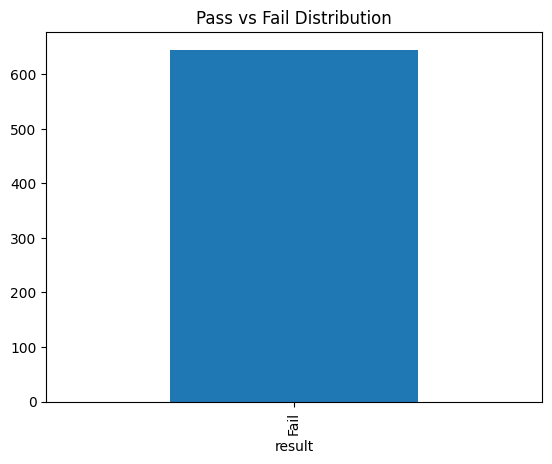

In [22]:
df["result"].value_counts().plot(kind="bar")
plt.title("Pass vs Fail Distribution")
plt.show()
